In [0]:
# CO Prediction

In [0]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
#drive.mount('/content/drive')

data = pd.read_csv('Measurement_summary.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [0]:
df=data['CO']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(647511, 1)


In [0]:
list_=[]
for i in range (0,df.shape[0]):
  list_.append(df[i][0])
print(len(list_))

647511


In [0]:
window_size=5
y=[]
for i in range (0,len(list_)-5):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


647506 [1.2, 1.2, 1.2, 1.2, 1.2]


In [0]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['X1','X2','X3','X4','Y'])
new_data.head(10)


(647506, 5)


,X1,X2,X3,X4,Y
0,1.2,1.2,1.2,1.2,1.2
1,1.2,1.2,1.2,1.2,1.1
2,1.2,1.2,1.2,1.1,1.1
3,1.2,1.2,1.1,1.1,1.0
4,1.2,1.1,1.1,1.0,1.1
5,1.1,1.1,1.0,1.1,1.1
6,1.1,1.0,1.1,1.1,1.0
7,1.0,1.1,1.1,1.0,1.0
8,1.1,1.1,1.0,1.0,1.0
9,1.1,1.0,1.0,1.0,1.0


In [0]:
# NORMALISE the DATASET
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
#matrix= scaler.fit_transform(matrix)
#mm_scaler.transform(X_test)
#new_data = pd.DataFrame(matrix,columns=['X1','X2','X3','X4','Y'])
#new_data.head(10)

In [0]:
print(matrix[:,4])

[[1.2]
 [1.1]
 [1.1]
 ...
 [0.4]
 [0.4]
 [0.5]]


In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
print(prediction.shape,prediction[0:5])

(213677, 1) [[0.42665281]
 [1.20499049]
 [0.28087356]
 [0.62227047]
 [0.65403799]]


In [0]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.4911305858162514
[0.12347258]
[[0.05730426 0.00080435 0.20145791 0.49838406]]


In [0]:
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

0.2876767143934835
0.49932210907292984


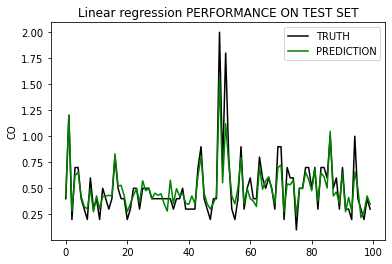

In [0]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('CO')
plt.legend()
plt.show()

In [0]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
model = linear_model.BayesianRidge()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

0.2876771177916154
0.49932070490875957


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.3326487835714897
0.3305457953419919


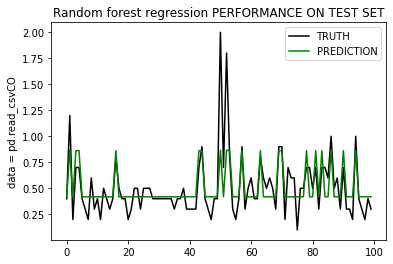

In [0]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('data = pd.read_csvCO')
plt.legend()
plt.show()

In [0]:
# IMPLEMENTING LASSO REGRESSION
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

0.38596275683828135
0.09876138004735135


In [0]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))


0.2876770680296813
0.49932087812217407


In [0]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.31490024139570083
0.4000777334571637


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


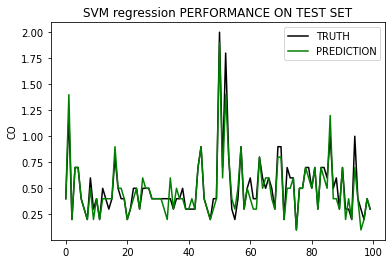

In [0]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('CO')
plt.legend()
plt.show()

In [0]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=50, batch_size=64)

Using TensorFlow backend.


Epoch 1/50
433829/433829 [==============================] - 19s 45us/step - loss: 0.1061 - accuracy: 0.0263
Epoch 2/50
433829/433829 [==============================] - 18s 41us/step - loss: 0.1729 - accuracy: 0.0228
Epoch 3/50
433829/433829 [==============================] - 17s 40us/step - loss: 0.1163 - accuracy: 0.0253
Epoch 4/50
433829/433829 [==============================] - 18s 41us/step - loss: 0.1146 - accuracy: 0.0255
Epoch 5/50
433829/433829 [==============================] - 18s 41us/step - loss: 0.0866 - accuracy: 0.0266
Epoch 6/50
433829/433829 [==============================] - 18s 40us/step - loss: 0.2249 - accuracy: 0.0190
Epoch 7/50
433829/433829 [==============================] - 17s 39us/step - loss: 0.1188 - accuracy: 0.0249
Epoch 8/50
433829/433829 [==============================] - 17s 40us/step - loss: 0.0965 - accuracy: 0.0267
Epoch 9/50
433829/433829 [==============================] - 17s 40us/step - loss: 0.0864 - accuracy: 0.0266
Epoch 10/50
433829/433829 [=

dict_keys(['loss', 'accuracy'])


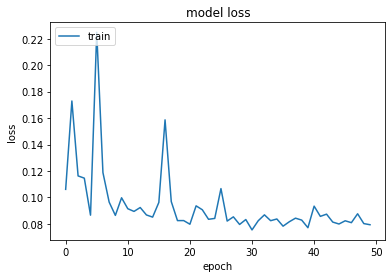

0.29198498345756657


In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred)**0.5)
#Converting predictions to label


In [0]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.6 0.6 0.6 0.7]
 [0.4 0.5 0.5 0.4]
 [0.7 0.6 0.6 0.7]
 ...
 [0.3 0.3 0.4 0.4]
 [0.3 0.3 0.3 0.3]
 [0.5 0.5 0.5 0.5]]
(433829, 4)
(433829, 4, 1)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
433829/433829 [==============================] - 451s 1ms/step - loss: 0.0929
Epoch 2/30
433829/433829 [==============================] - 454s 1ms/step - loss: 0.0901
Epoch 3/30
433829/433829 [==============================] - 449s 1ms/step - loss: 0.0888
Epoch 4/30
433829/433829 [==============================] - 449s 1ms/step - loss: 0.0889
Epoch 5/30
433829/433829 [==============================] - 453s 1ms/step - loss: 0.0903
Epoch 6/30
433829/433829 [==============================] - 449s 1ms/step - loss: 0.0873
Epoch 7/30
433829/433829 [==============================] - 449s 1ms/step - loss: 0.0864
Epoch 8/30
433829/433829 [==============================] - 441s 1ms/step - loss: 0.0880
Epoch 9/30
433829/433829 [==============================] - 451s 1ms/step - loss: 0.0893
Epoch 10/30
433829/433829 [==============================] - 446s 1ms/step - loss: 0.0850
Epoch 11/30
433829/433829 [==============================] - 446s 1ms/step - loss: 0.0834
Epoch 12/30
433829/

dict_keys(['loss'])


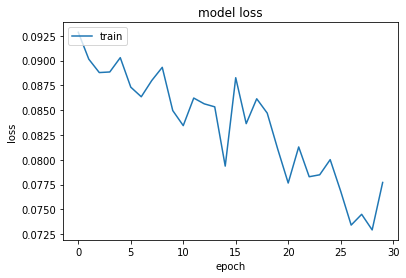

0.2746532099289284


In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test,y_pred)**0.5)

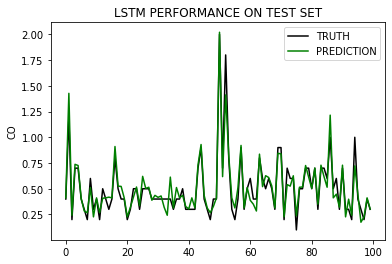

In [0]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(y_pred[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('CO')
plt.legend()
plt.show()